<h1>Salary Prediction Model<h1>


The Salary Dataset contains **6704 rows** and **6 columns** containing the following data:

1. **Age**
2. **Gender**
3. **Education Level**
4. **Job Title**
5. **Years of Experience**
6. **Salary**

First we pre-process, clean and model the data to standarsise and structure it.


In [57]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error 

In [58]:
# Importing Data

df = pd.read_csv(r'Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [60]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [61]:
# Checking for null data

df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [62]:
# Dropping null values from database

df.dropna(inplace=True)

In [63]:
# Checking unique value counts of Job Titles in the database

df['Job Title'].value_counts()

Job Title
Software Engineer                     518
Data Scientist                        453
Software Engineer Manager             376
Data Analyst                          363
Senior Project Engineer               318
                                     ... 
Junior Research Scientist               1
Senior Product Development Manager      1
Junior Social Media Specialist          1
Senior Software Architect               1
Social Media Man                        1
Name: count, Length: 191, dtype: int64

In [64]:
# Reducing Job titles by omitting titles with less than 10 counts

job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=10]
job_title_edited.count()

np.int64(136)

In [65]:
# Omitting titles with less than 10 counts

df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
df['Job Title'].nunique()

56

In [66]:
df['Job Title'].value_counts()

Job Title
Software Engineer                   518
Data Scientist                      453
Software Engineer Manager           376
Data Analyst                        363
Senior Project Engineer             318
Product Manager                     313
Full Stack Engineer                 308
Others                              297
Marketing Manager                   255
Senior Software Engineer            244
Back end Developer                  244
Front end Developer                 241
Marketing Coordinator               158
Junior Sales Associate              142
Financial Manager                   134
Marketing Analyst                   132
Software Developer                  125
Operations Manager                  114
Human Resources Manager             104
Director of Marketing                88
Web Developer                        87
Product Designer                     75
Research Director                    75
Content Marketing Manager            73
Sales Associate               

In [67]:
#Checking unique value count of Education Level

df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [68]:
# Combining repeating values of education level

df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [69]:
# Checking Unique Value count of Gender

df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

<h1>Exploratory Data Analysis<h1>

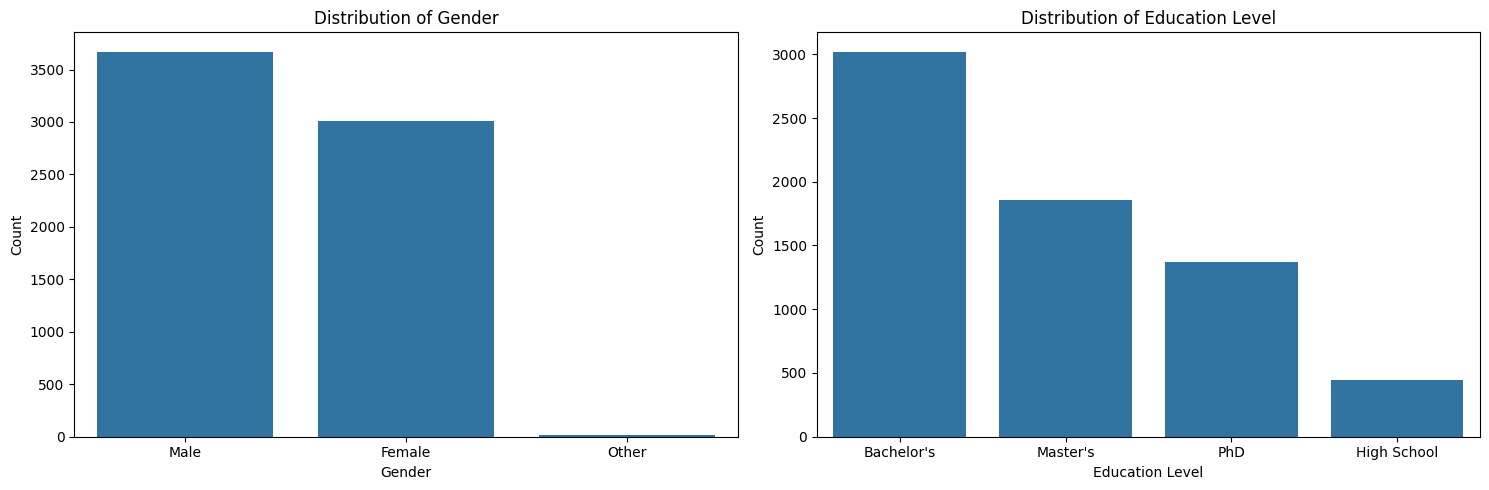

In [70]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the count of data points for each gender category in the first subplot
sns.countplot(x='Gender', data=df, ax=ax[0])

# Plot the count of data points for each education level category in the second subplot
sns.countplot(x='Education Level', data=df, ax=ax[1])

# Add labels and titles for the subplots
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

# Show the plots
plt.tight_layout()
plt.show()

**Distribution of Gender and Education Level**
    
1. **Distribution of Gender:** The job market is mostly dominated by males with females being second largest group and extremely few people from the third gender. This shows that while women are slowly becoming a part of the workforce, people belonging to other genders do have very few opportunities.
    
2. **Distribution of Education Level:** A majority of working professionals hold a bachelor's degree followed by master's and PhD holders with least hireable being just High school graduates. This means a bachelor's degree is sufficient to enter the workforce and highly in demand by employers.


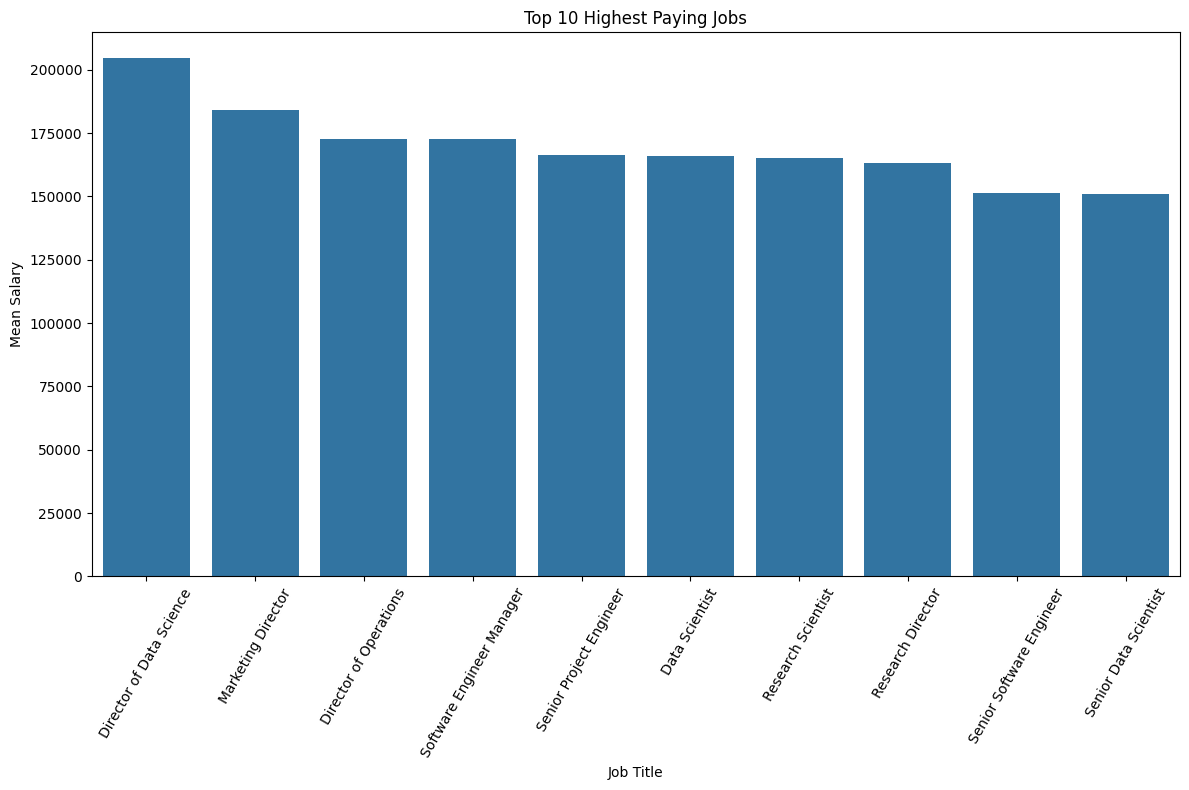

In [71]:
# Get the top 10 job titles with the highest mean salary
top_10_highest_paying_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10)

# Create a single bar plot for the top 10 highest paying job titles and their mean salaries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values)

# Customize the plot
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()


**Top 10 Highest Paying Jobs**
    
The plot shows the Top 10 highest paying jobs in the industry plotted against the mean salary offered for the role. We can see that Data Scientists and Engineers are paid the highest.

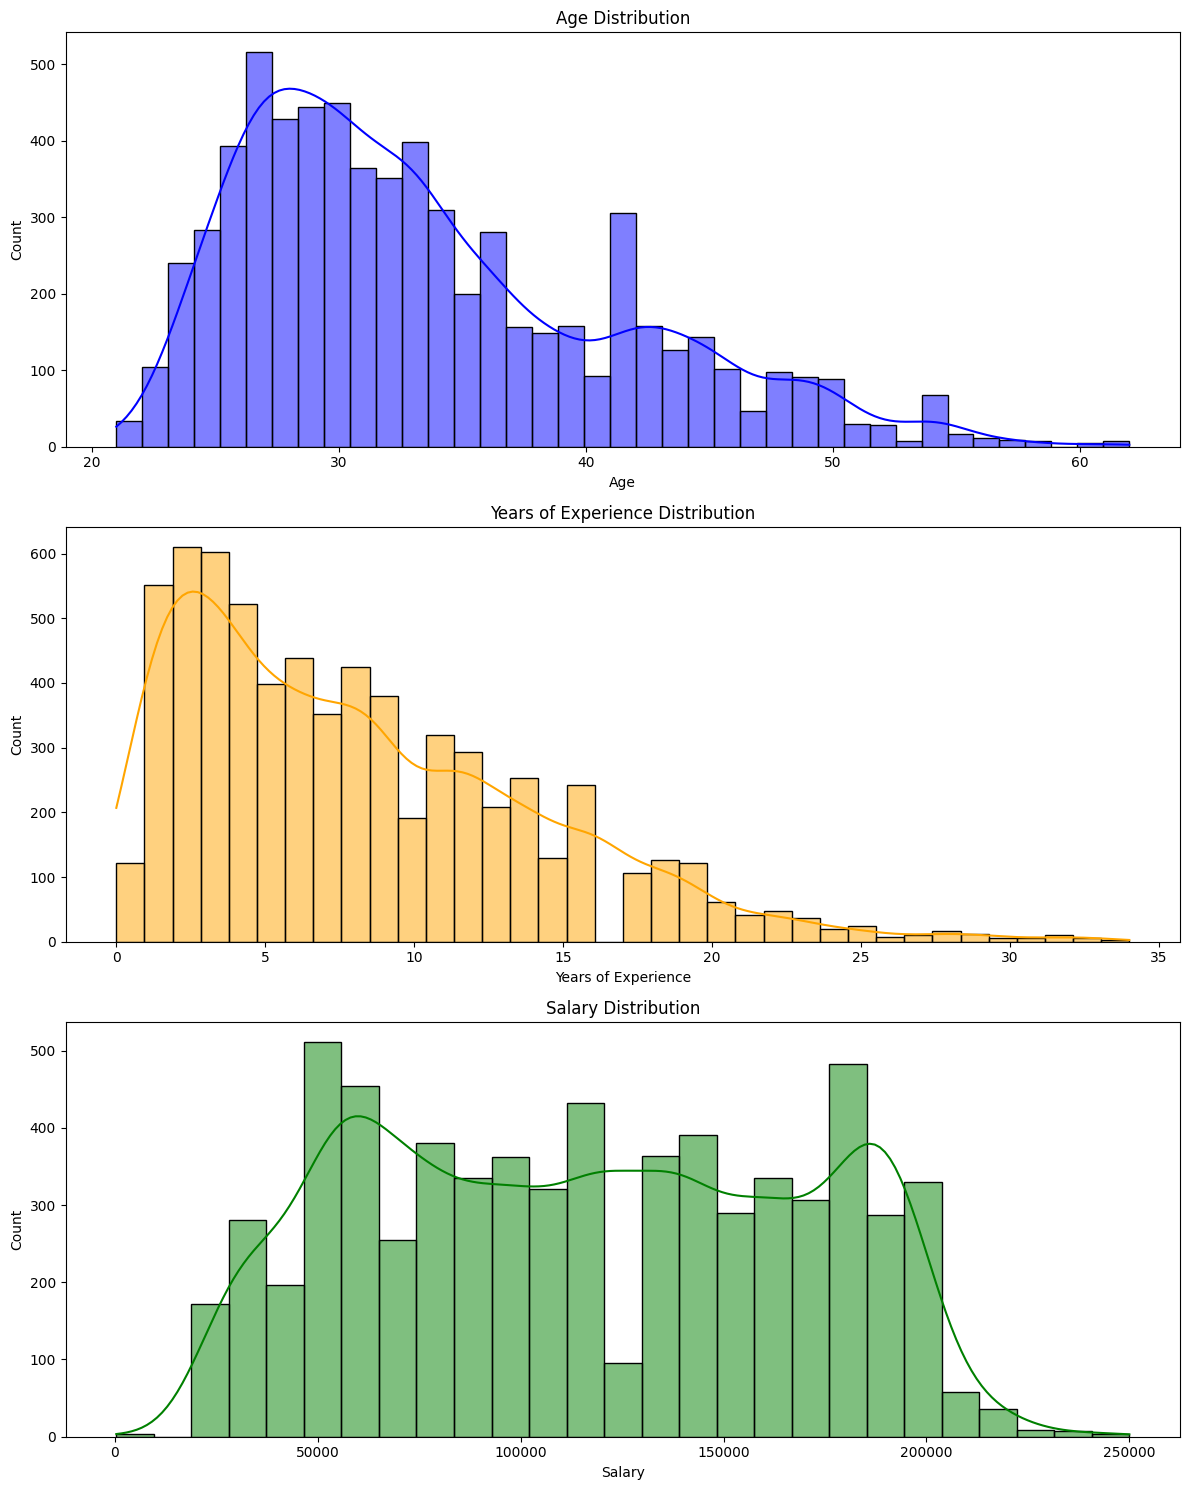

In [72]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Create a histogram of Age in the first subplot
sns.histplot(df['Age'], ax=ax[0], color='blue', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Years of Experience in the second subplot
sns.histplot(df['Years of Experience'], ax=ax[1], color='orange', kde=True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')

# Create a histogram of Salary in the third subplot
sns.histplot(df['Salary'], ax=ax[2], color='green', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()


**Distribution of continuous variables**
    
1. **Age Distribution:** It shows that majority of workforce lies in the 27-31 age range which suggests a highly youthful workforce.
    
2. **Years of Experience Distribution:** The plot shows that maximum workforce has 1-4 years of experience which is in agreement with previous results. Younger workforce has less experience than older counterparts
    
3. **Salary Distribution:** The salary majority of workers earn lies in 50,000-60,000 dollars range while similar count of people earn 1,80,000 as well. The plot reveals that there is a lot of different pay ranges within the community with majority of workers earning less than 1,25,000 dollars yearly.


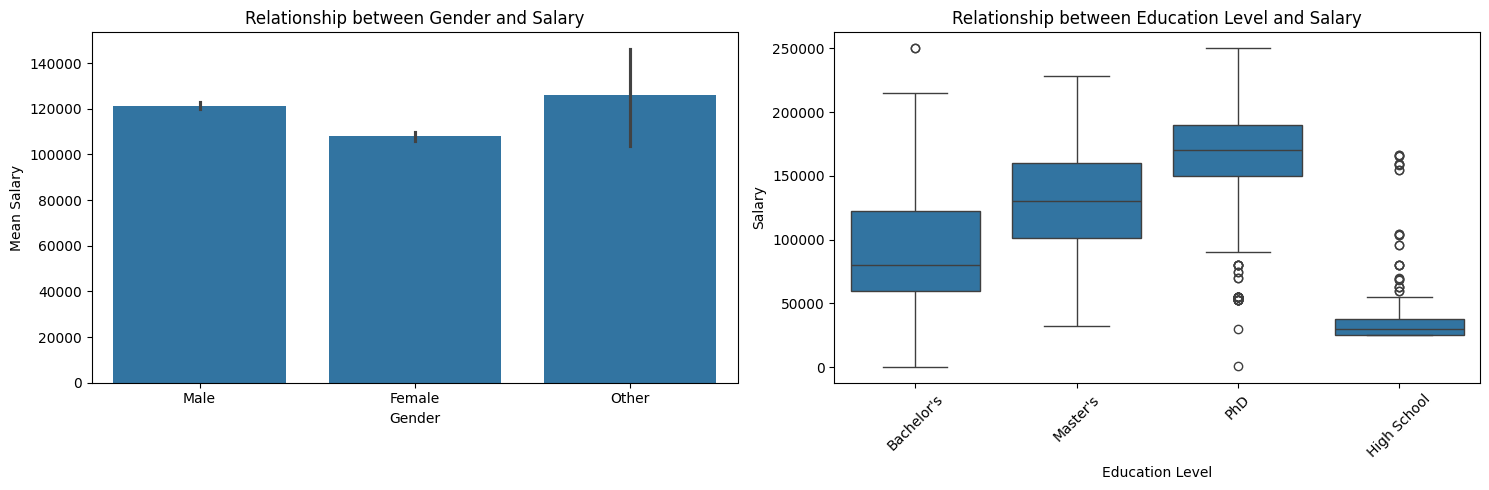

In [73]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a bar plot for the relationship between Gender and Salary in the first subplot
sns.barplot(x='Gender', y='Salary', data=df, ax=ax[0])
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')

# Create a box plot for the relationship between Education Level and Salary in the second subplot
sns.boxplot(x='Education Level', y='Salary', data=df, ax=ax[1])
ax[1].set(title='Relationship between Education Level and Salary', xlabel='Education Level', ylabel='Salary')

# Rotate x-axis labels in the second subplot for better readability
ax[1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

**Relationship between discreet variables**
    
1. **Gender and Salary:** Other genders earn more than men and women. Women earn the least out of all three genders.
    
2. **Education Level and Salary:** The plot reveals that as your education level rises, the mean salary level also rises. High school graduates are paid the least and PhD's the highest. The box plot also reveals the range of salaries and it is highest for bacahelr's degree meaning the distribution of salaries is more diverse for bachelor's degree with some earning as much as somone with a Master's degree would.
    

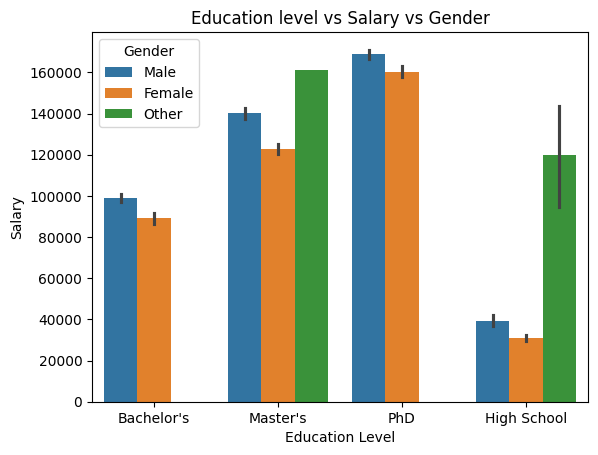

In [74]:
sns.barplot(x='Education Level',y='Salary',data=df,hue='Gender').set(title='Education level vs Salary vs Gender')
plt.show()

**Relationship between Education Level, Salary and Gender**

Following trends from previous charts, men on an average are paid more than women with same education level. Where the third gender is present, they are paid more than both the genders. Also, the more you are educated, the more you are paid.

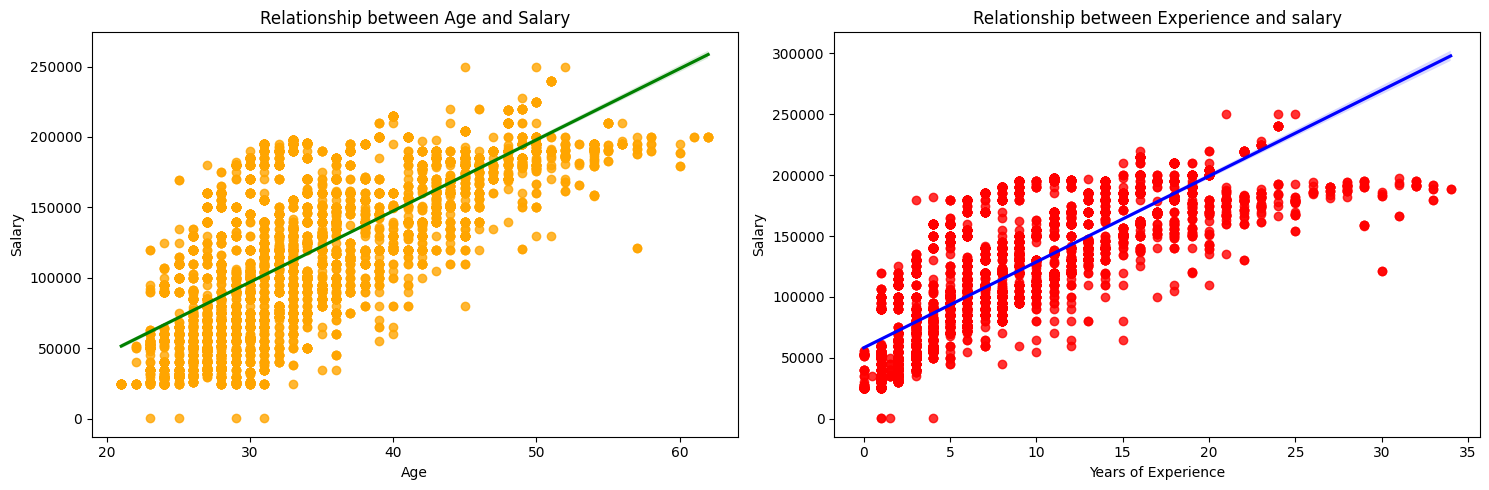

In [75]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for relationship between age and salary
sns.regplot(x='Age',y='Salary',data=df, scatter_kws={'color':'orange'}, line_kws={'color':'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Salary')

# Scatter plot for relationship between experience and salary
sns.regplot(x='Years of Experience',y='Salary',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience and salary')

plt.tight_layout()
plt.show()

1. **Relationship between Age and Salary:** The is strong positive correlation between age and salary meaning older employees get paid more than younger e,ployees.

2. **Relationship between Experience and Salary:** There is strong positive correlation between Experience and salary meaning experienced candidates get paid more. The more experience a candidate gains, the more their salary will become.


In [76]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Others,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Others,20.0,200000.0


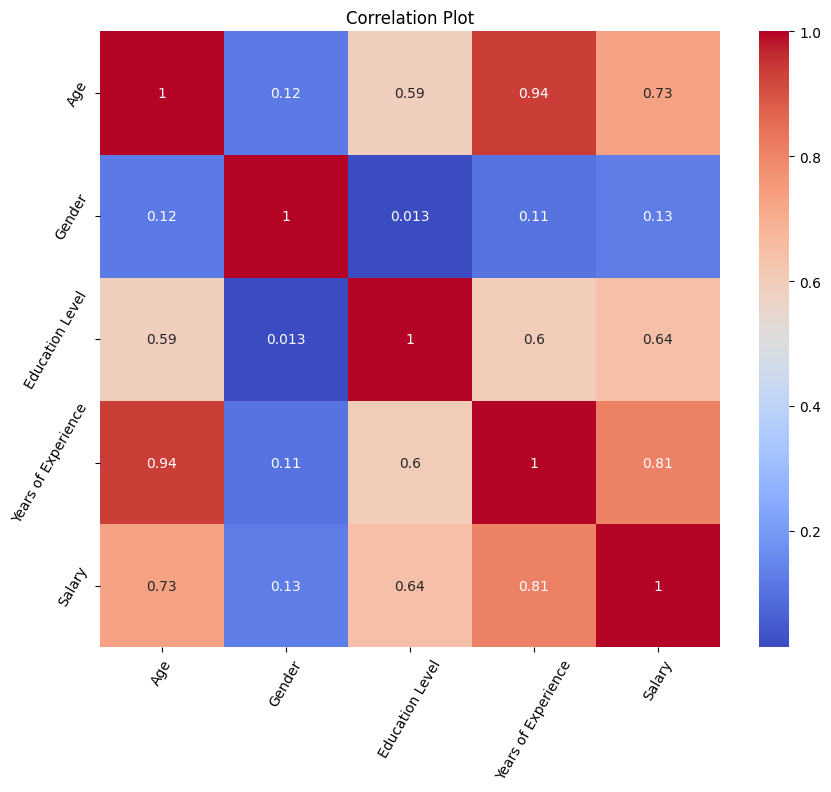

In [77]:
# Mapping Education Level column
education_mapping = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
df['Education Level'] = df['Education Level'].map(education_mapping)

# Label encoding the categorical variable
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Correlation plot
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
  # Use cmap for color map
plt.title('Correlation Plot')
plt.xticks(rotation=60) 
plt.yticks(rotation=60) 
plt.show()


**Heatmap**

The heatmap reveals the degree of correlation between the variables

1. Highest correlation between age and years of experience
2. High correlation between salary and years of experience
3. High correlation between salary and age
4. Moderately high correlation between salary and education level
5. Low correlation between gender and all variables


**Predicting Salary**

3 Models will be used to predict the salary

1. Linear Regression
2. Deision Tree
3. Random Forest

In [78]:
# detecting the outliers in salary column using IQR method
Q1 = df.Salary.quantile(0.25) # First Quartile
Q3 = df.Salary.quantile(0.75) # Third Quartile

# Caltulation Interquartile
IQR = Q3-Q1

# Deetecting outliers lying 1.5x of IQR above and below Q1 and Q3 resp
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [79]:
df[df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


**No outliers in Q3**

In [80]:
df[df.Salary<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


**No outliers in Q1**

<h2>Preparing the data for ML analysis by converting categorical job titles into a numerical format<h2>

In [81]:
# Creating dummies for Job titles
dummies = pd.get_dummies(df['Job Title'],drop_first=True)
df = pd.concat([df,dummies],axis=1)
print(df.columns.tolist())

# Drop Job Title column
df.drop('Job Title',inplace=True,axis=1)
print(df.columns.tolist())

df.head()

['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary', 'Content Marketing Manager', 'Data Analyst', 'Data Scientist', 'Digital Marketing Manager', 'Digital Marketing Specialist', 'Director of Data Science', 'Director of HR', 'Director of Marketing', 'Director of Operations', 'Financial Analyst', 'Financial Manager', 'Front End Developer', 'Front end Developer', 'Full Stack Engineer', 'Graphic Designer', 'Human Resources Coordinator', 'Human Resources Manager', 'Junior Data Analyst', 'Junior HR Coordinator', 'Junior HR Generalist', 'Junior Marketing Manager', 'Junior Sales Associate', 'Junior Sales Representative', 'Junior Software Developer', 'Junior Software Engineer', 'Junior Web Developer', 'Marketing Analyst', 'Marketing Coordinator', 'Marketing Director', 'Marketing Manager', 'Operations Manager', 'Others', 'Product Designer', 'Product Manager', 'Project Manager', 'Receptionist', 'Research Director', 'Research Scientist', 'Sales Associate', 'Sales Direc

,Age,Gender,Education Level,Years of Experience,Salary,Content Marketing Manager,Data Analyst,Data Scientist,Digital Marketing Manager,Digital Marketing Specialist,...,Senior Human Resources Manager,Senior Product Marketing Manager,Senior Project Engineer,Senior Research Scientist,Senior Software Engineer,Social Media Manager,Software Developer,Software Engineer,Software Engineer Manager,Web Developer
0,32.0,1,1,5.0,90000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,28.0,0,2,3.0,65000.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,1,3,15.0,150000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,0,1,7.0,60000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,1,2,20.0,200000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
df["Job Title"].value_counts()

KeyError: 'Job Title'

In [26]:
# Separating the dataset into features and target

# Dataset conntaining all features from df
features = df.drop('Salary',axis=1)

# Series containing target variable to be predicted
target = df['Salary']

In [27]:
# Splitting data into 25% training and 75% test sets

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=42)
x_train.shape

(5023, 59)

In [28]:
# Create a dictionary for defining models and tuning hyperparameters

model_params = {
    'Linear_Regression':{
        'model':LinearRegression(),
        'params':{
            
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[2,4,6,8,10],
            'random_state':[0,42],
            'min_samples_split':[1,5,10,20]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,30,20,50,80]
        }
    }
}

In [29]:
# Hyper parameter tuning through grid search cv
score=[]

for model_name,m in model_params.items():
    clf = GridSearchCV(m['model'],m['params'],cv=5,scoring='neg_mean_squared_error')
    clf.fit(x_train,y_train)
    
    score.append({
        'Model':model_name,
        'Params':clf.best_params_,
        'MSE(-ve)':clf.best_score_
    })
pd.DataFrame(score)    

,Model,Params,MSE(-ve)
0,Linear_Regression,{},-4.611384e+08
1,Decision_Tree,"{'max_depth': 10, 'min_samples_split': 5, 'ran...",-1.519468e+08
2,Random_Forest,{'n_estimators': 30},-6.890678e+07


In [30]:
# Order of the best models 

s = pd.DataFrame(score)
sort = s.sort_values(by = 'MSE(-ve)',ascending=False)
sort

,Model,Params,MSE(-ve)
2,Random_Forest,{'n_estimators': 30},-6.890678e+07
1,Decision_Tree,"{'max_depth': 10, 'min_samples_split': 5, 'ran...",-1.519468e+08
0,Linear_Regression,{},-4.611384e+08


In [31]:
# Random Forest model

rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(x_train,y_train)

,n_estimators,20
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
rfr.score(x_test,y_test)

0.9719789202019736

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_rfr = rfr.predict(x_test)

print("Mean Squared Error       :", mean_squared_error(y_test, y_pred_rfr))
print("Mean Absolute Error      :", mean_absolute_error(y_test, y_pred_rfr))
print("Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test, y_pred_rfr)))


Mean Squared Error       : 79895887.34932284
Mean Absolute Error      : 3385.7180391675224
Root Mean Squared Error : 8938.44994108726


In [34]:
# Decision Tree model

dtr = DecisionTreeRegressor(max_depth=10,min_samples_split=2,random_state=0)
dtr.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [35]:
dtr.score(x_test,y_test)

0.9420446019603785

In [36]:
y_pred_dtr = dtr.predict(x_test)

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_dtr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_dtr))
print("Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test, y_pred_dtr)))


Mean Squared Error : 165246949.3122428
Mean Absolute Error : 7624.698188534626
Root Mean Squared Error : 12854.841473633302


In [37]:
# Linear regression model

lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
lr.score(x_test,y_test)

0.8347077106154032

In [39]:
y_pred_lr = lr.predict(x_test)

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_lr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_lr))
print("Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Mean Squared Error : 471294262.30439585
Mean Absolute Error : 15585.461097796497
Root Mean Squared Error : 21709.31280129327


In [77]:
%pip install xgboost

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

xgb = XGBRegressor(random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

print("\n📌 XGBoost Results")
print("MAE  :", mean_absolute_error(y_test, y_pred_xgb))
print("MSE  :", mean_squared_error(y_test, y_pred_xgb))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))



📌 XGBoost Results
MAE  : 5207.937579291045
MSE  : 95199711.70027263
RMSE : 9757.033960188548


In [79]:
%pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 256.1 kB/s eta 0:00:04
   -------------- ------------------------- 0.5/1.5 MB 256.1 kB/s eta 0:00:04
   -------------- ------------------------- 0.5/1.5 MB 256.1 kB/s eta 0:00:04
   -------------- ------------------------- 0.5/1.5 MB 256.1 kB/s eta 0:00:0

In [41]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(x_train, y_train)
y_pred_lgb = lgbm.predict(x_test)

print("\n📌 LightGBM Results")
print("MAE  :", mean_absolute_error(y_test, y_pred_lgb))
print("MSE  :", mean_squared_error(y_test, y_pred_lgb))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_lgb)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 5023, number of used features: 53
[LightGBM] [Info] Start training from score 115363.772248

📌 LightGBM Results
MAE  : 6565.083826528257
MSE  : 114436497.89419721
RMSE : 10697.49960945067


In [81]:
%pip install catboost

  Using cached catboost-1.2.8-cp313-cp313-win_amd64.whl.metadata (1.5 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-6.2.0-py3-none-any.whl.metadata (8.5 kB)
Using cached catboost-1.2.8-cp313-cp313-win_amd64.whl (102.4 MB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)
Using cached plotly-6.2.0-py3-none-any.whl (9.6 MB)

   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   ---------------------------------------- 0/4 [narwhals]
   -------------------------------------

In [42]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(verbose=0, random_state=42)
cat.fit(x_train, y_train)
y_pred_cat = cat.predict(x_test)

print("\n📌 CatBoost Results")
print("MAE  :", mean_absolute_error(y_test, y_pred_cat))
print("MSE  :", mean_squared_error(y_test, y_pred_cat))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_cat)))


📌 CatBoost Results
MAE  : 5768.218395283502
MSE  : 91898761.05860388
RMSE : 9586.38414933409


🔄 Training Ensemble Components...

📊 Random Forest Performance:
   MAE  : $3,408.01
   MSE  : 80,765,914.70
   RMSE : $8,986.99

📊 XGBoost Performance:
   MAE  : $7,108.67
   MSE  : 119,874,302.37
   RMSE : $10,948.71

🔍 Finding Optimal Weights...
🎯 Optimal Weights Found:
   Random Forest: 1.0
   XGBoost      : 0.0

📊 🏆 ENSEMBLE Performance:
   MAE  : $3,408.01
   MSE  : 80,765,914.70
   RMSE : $8,986.99

📈 PERFORMANCE COMPARISON
           Model      MAE           MSE      RMSE
0  Random Forest  3408.01  8.076591e+07   8986.99
1        XGBoost  7108.67  1.198743e+08  10948.71
2     🏆 Ensemble  3408.01  8.076591e+07   8986.99

🚀 ENSEMBLE IMPROVEMENTS:
   vs Random Forest: +0.00% MAE improvement
   vs XGBoost      : +52.06% MAE improvement


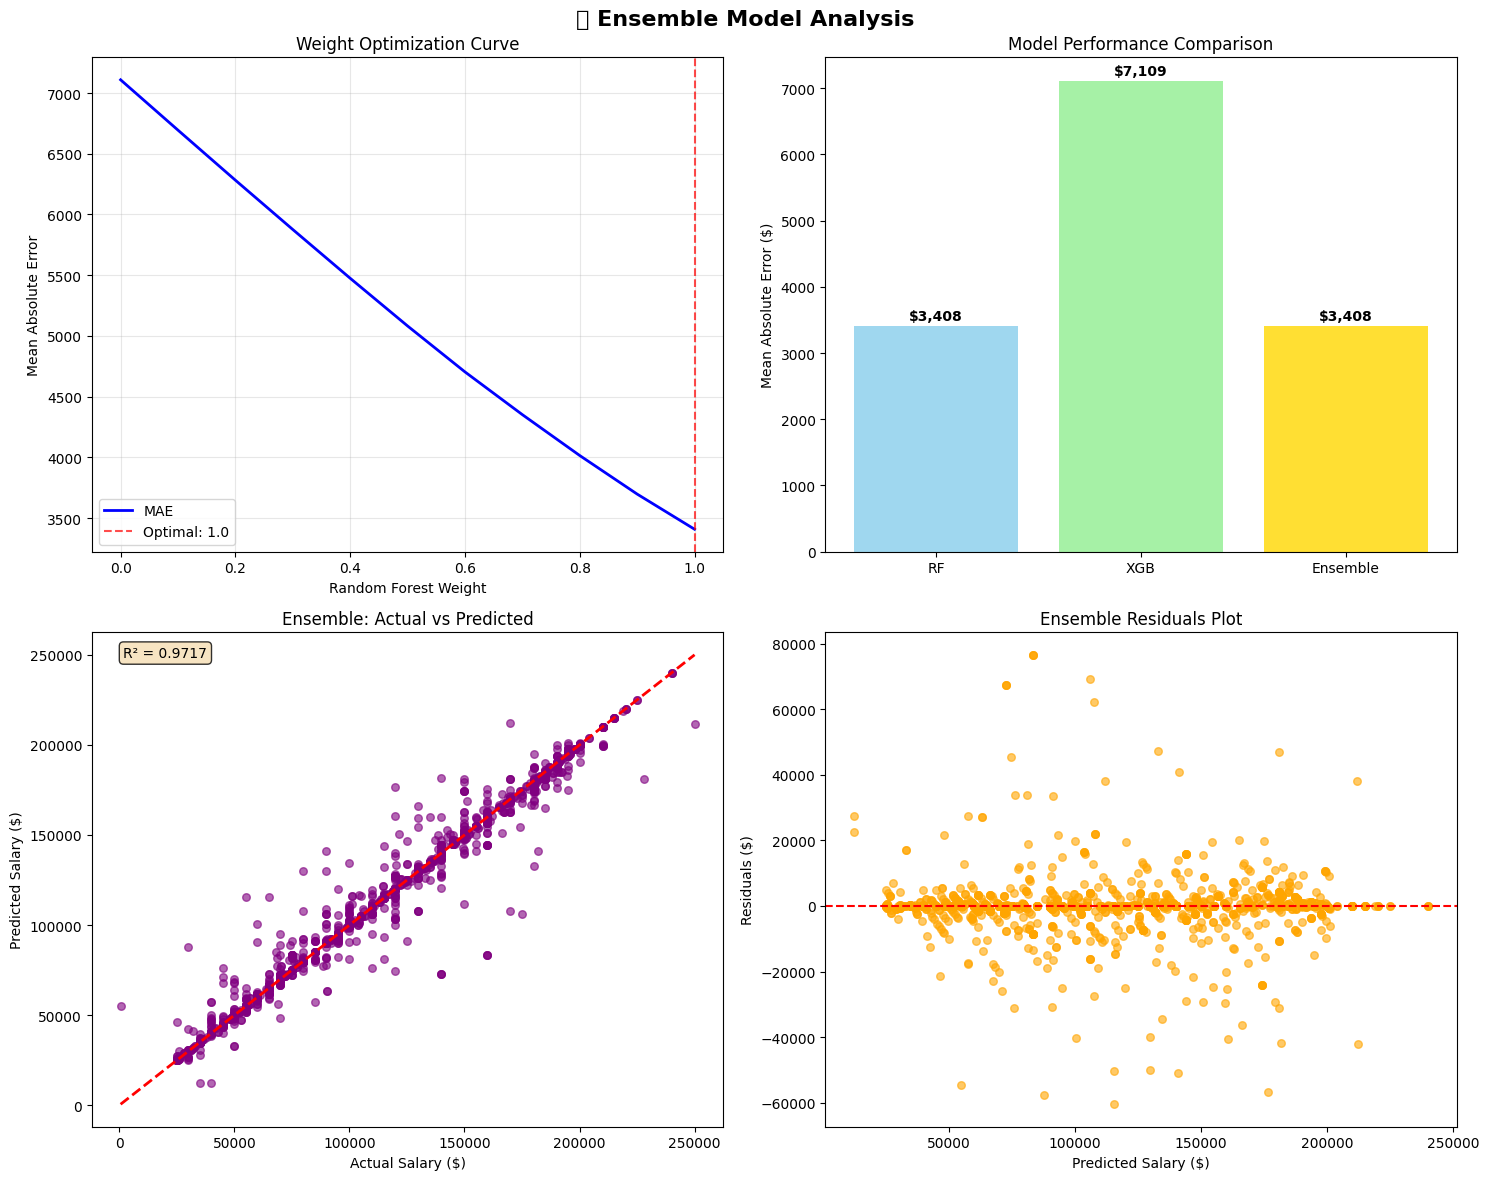


💾 ENSEMBLE MODEL SUMMARY
✅ Ensemble successfully created!
📊 Final Performance:
   • MAE : $3,408.01
   • RMSE: $8,986.99
   • R²  : 0.9717
🎯 Optimal Weights: RF(1.0) + XGB(0.0)

🔮 EXAMPLE PREDICTION:
Sample Input: Age=30, Gender=1, Education=1, Experience=5 years
Random Forest : $100,000.00
XGBoost      : $89,965.71
🏆 Ensemble   : $100,000.00

✨ Ensemble model ready for use! ✨


In [43]:
# ================================================================
# ENSEMBLE MODEL: Random Forest + XGBoost Weighted Averaging
# Add this code after your existing model training sections
# ================================================================

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# ================================================================
# STEP 1: Train Individual Models (using your existing split data)
# ================================================================

print("🔄 Training Ensemble Components...")
print("=" * 50)

# Random Forest (using your existing optimal parameters)
rf_ensemble = RandomForestRegressor(n_estimators=20, random_state=42)
rf_ensemble.fit(x_train, y_train)
rf_pred = rf_ensemble.predict(x_test)

# XGBoost (you can adjust parameters based on your grid search results)
from xgboost import XGBRegressor
xgb_ensemble = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_ensemble.fit(x_train, y_train)
xgb_pred = xgb_ensemble.predict(x_test)

# ================================================================
# STEP 2: Individual Model Performance
# ================================================================

def evaluate_model(y_true, y_pred, model_name):
    """Calculate and display model performance metrics"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"\n📊 {model_name} Performance:")
    print(f"   MAE  : ${mae:,.2f}")
    print(f"   MSE  : {mse:,.2f}")
    print(f"   RMSE : ${rmse:,.2f}")
    
    return mae, mse, rmse

# Evaluate individual models
rf_mae, rf_mse, rf_rmse = evaluate_model(y_test, rf_pred, "Random Forest")
xgb_mae, xgb_mse, xgb_rmse = evaluate_model(y_test, xgb_pred, "XGBoost")

# ================================================================
# STEP 3: Optimal Weight Finding
# ================================================================

print("\n🔍 Finding Optimal Weights...")
print("=" * 50)

def find_optimal_weights(y_true, pred1, pred2, weight_range=np.arange(0, 1.1, 0.1)):
    """Find optimal weights for ensemble averaging"""
    best_mae = float('inf')
    best_weights = None
    weight_results = []
    
    for w1 in weight_range:
        w2 = 1 - w1
        ensemble_pred = w1 * pred1 + w2 * pred2
        mae = mean_absolute_error(y_true, ensemble_pred)
        mse = mean_squared_error(y_true, ensemble_pred)
        rmse = np.sqrt(mse)
        
        weight_results.append({
            'rf_weight': w1,
            'xgb_weight': w2,
            'mae': mae,
            'mse': mse,
            'rmse': rmse
        })
        
        if mae < best_mae:
            best_mae = mae
            best_weights = (w1, w2)
    
    return best_weights, weight_results

# Find optimal weights
optimal_weights, weight_results = find_optimal_weights(y_test, rf_pred, xgb_pred)
rf_weight, xgb_weight = optimal_weights

print(f"🎯 Optimal Weights Found:")
print(f"   Random Forest: {rf_weight:.1f}")
print(f"   XGBoost      : {xgb_weight:.1f}")

# ================================================================
# STEP 4: Create Ensemble Predictions
# ================================================================

# Create ensemble predictions using optimal weights
ensemble_pred = rf_weight * rf_pred + xgb_weight * xgb_pred

# Evaluate ensemble performance
ensemble_mae, ensemble_mse, ensemble_rmse = evaluate_model(y_test, ensemble_pred, "🏆 ENSEMBLE")

# ================================================================
# STEP 5: Performance Comparison
# ================================================================

print("\n📈 PERFORMANCE COMPARISON")
print("=" * 50)

# Create comparison dataframe
comparison_data = {
    'Model': ['Random Forest', 'XGBoost', '🏆 Ensemble'],
    'MAE': [rf_mae, xgb_mae, ensemble_mae],
    'MSE': [rf_mse, xgb_mse, ensemble_mse],
    'RMSE': [rf_rmse, xgb_rmse, ensemble_rmse]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(2))

# Calculate improvement
rf_improvement = ((rf_mae - ensemble_mae) / rf_mae) * 100
xgb_improvement = ((xgb_mae - ensemble_mae) / xgb_mae) * 100

print(f"\n🚀 ENSEMBLE IMPROVEMENTS:")
print(f"   vs Random Forest: {rf_improvement:+.2f}% MAE improvement")
print(f"   vs XGBoost      : {xgb_improvement:+.2f}% MAE improvement")

# ================================================================
# STEP 6: Visualization
# ================================================================

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🎯 Ensemble Model Analysis', fontsize=16, fontweight='bold')

# 1. Weight Optimization Plot
weights_df = pd.DataFrame(weight_results)
axes[0, 0].plot(weights_df['rf_weight'], weights_df['mae'], 'b-', linewidth=2, label='MAE')
axes[0, 0].axvline(x=rf_weight, color='red', linestyle='--', alpha=0.7, label=f'Optimal: {rf_weight:.1f}')
axes[0, 0].set_xlabel('Random Forest Weight')
axes[0, 0].set_ylabel('Mean Absolute Error')
axes[0, 0].set_title('Weight Optimization Curve')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Performance Comparison Bar Chart
models = ['RF', 'XGB', 'Ensemble']
maes = [rf_mae, xgb_mae, ensemble_mae]
colors = ['skyblue', 'lightgreen', 'gold']

bars = axes[0, 1].bar(models, maes, color=colors, alpha=0.8)
axes[0, 1].set_ylabel('Mean Absolute Error ($)')
axes[0, 1].set_title('Model Performance Comparison')

# Add value labels on bars
for bar, mae in zip(bars, maes):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 50,
                    f'${mae:,.0f}', ha='center', va='bottom', fontweight='bold')

# 3. Actual vs Predicted Scatter Plot
axes[1, 0].scatter(y_test, ensemble_pred, alpha=0.6, color='purple', s=30)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Salary ($)')
axes[1, 0].set_ylabel('Predicted Salary ($)')
axes[1, 0].set_title('Ensemble: Actual vs Predicted')

# Calculate R²
from sklearn.metrics import r2_score
r2 = r2_score(y_test, ensemble_pred)
axes[1, 0].text(0.05, 0.95, f'R² = {r2:.4f}', transform=axes[1, 0].transAxes, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 4. Residuals Plot
residuals = y_test - ensemble_pred
axes[1, 1].scatter(ensemble_pred, residuals, alpha=0.6, color='orange', s=30)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Predicted Salary ($)')
axes[1, 1].set_ylabel('Residuals ($)')
axes[1, 1].set_title('Ensemble Residuals Plot')

plt.tight_layout()
plt.show()

# ================================================================
# STEP 7: Save Ensemble Model (Optional)
# ================================================================

print("\n💾 ENSEMBLE MODEL SUMMARY")
print("=" * 50)
print(f"✅ Ensemble successfully created!")
print(f"📊 Final Performance:")
print(f"   • MAE : ${ensemble_mae:,.2f}")
print(f"   • RMSE: ${ensemble_rmse:,.2f}")
print(f"   • R²  : {r2:.4f}")
print(f"🎯 Optimal Weights: RF({rf_weight:.1f}) + XGB({xgb_weight:.1f})")

# ================================================================
# STEP 8: Prediction Function for New Data
# ================================================================

def predict_salary_ensemble(age, gender, education, years_exp, job_features_dict=None):
    """
    Make salary predictions using the ensemble model
    
    Parameters:
    - age: int (age of person)
    - gender: int (0, 1, 2 - encoded)
    - education: int (0-3, mapped as in your original code)
    - years_exp: int (years of experience)
    - job_features_dict: dict of job title dummy variables (optional)
    
    Returns:
    - predicted salary
    """
    
    # Create feature array (adjust size based on your feature count)
    features = np.zeros(x_train.shape[1])  # Initialize with zeros
    
    # Set basic features
    features[0] = age
    features[1] = gender  
    features[2] = education
    features[3] = years_exp
    
    # Set job title dummies if provided
    if job_features_dict:
        feature_names = list(x_train.columns)
        for job_title, value in job_features_dict.items():
            if job_title in feature_names:
                idx = feature_names.index(job_title)
                features[idx] = value
    
    # Reshape for prediction
    features = features.reshape(1, -1)
    
    # Get predictions from both models
    rf_pred = rf_ensemble.predict(features)[0]
    xgb_pred = xgb_ensemble.predict(features)[0]
    
    # Ensemble prediction
    ensemble_pred = rf_weight * rf_pred + xgb_weight * xgb_pred
    
    return ensemble_pred, rf_pred, xgb_pred

# Example usage
print("\n🔮 EXAMPLE PREDICTION:")
print("=" * 30)
sample_pred, rf_sample, xgb_sample = predict_salary_ensemble(
    age=30, 
    gender=1, 
    education=1, 
    years_exp=5
)

print(f"Sample Input: Age=30, Gender=1, Education=1, Experience=5 years")
print(f"Random Forest : ${rf_sample:,.2f}")
print(f"XGBoost      : ${xgb_sample:,.2f}")
print(f"🏆 Ensemble   : ${sample_pred:,.2f}")

print("\n✨ Ensemble model ready for use! ✨")

🔧 IMPROVED ENSEMBLE WITH OPTIMIZED XGBOOST
🎯 Tuning XGBoost to match your original performance...

📊 🌲 Random Forest:
   MAE  : $3,408.01
   MSE  : 80,765,914.70
   RMSE : $8,986.99
   R²   : 0.9717

📊 ⚡ Tuned XGBoost:
   MAE  : $9,669.04
   MSE  : 181,024,072.18
   RMSE : $13,454.52
   R²   : 0.9365

🧠 SMART ENSEMBLE STRATEGIES
📈 Performance-based weights:
   RF weight : 0.739
   XGB weight: 0.261
🎯 Fine-tuned optimal weights:
   RF weight : 1.000
   XGB weight: 0.000
   Best MAE  : $3,408.01

🏆 ENSEMBLE COMPARISON

📊 🎯 Simple Average:
   MAE  : $6,294.35
   MSE  : 98,475,906.93
   RMSE : $9,923.50
   R²   : 0.9655

📊 🎯 Performance Weighted:
   MAE  : $4,800.55
   MSE  : 81,906,551.24
   RMSE : $9,050.22
   R²   : 0.9713

📊 🎯 Optimized Weights:
   MAE  : $3,408.01
   MSE  : 80,765,914.70
   RMSE : $8,986.99
   R²   : 0.9717

📊 🎯 Conditional Ensemble:
   MAE  : $3,408.01
   MSE  : 80,765,914.70
   RMSE : $8,986.99
   R²   : 0.9717

🥇 BEST ENSEMBLE: Optimized Weights
   MAE: $3,408.01
📊

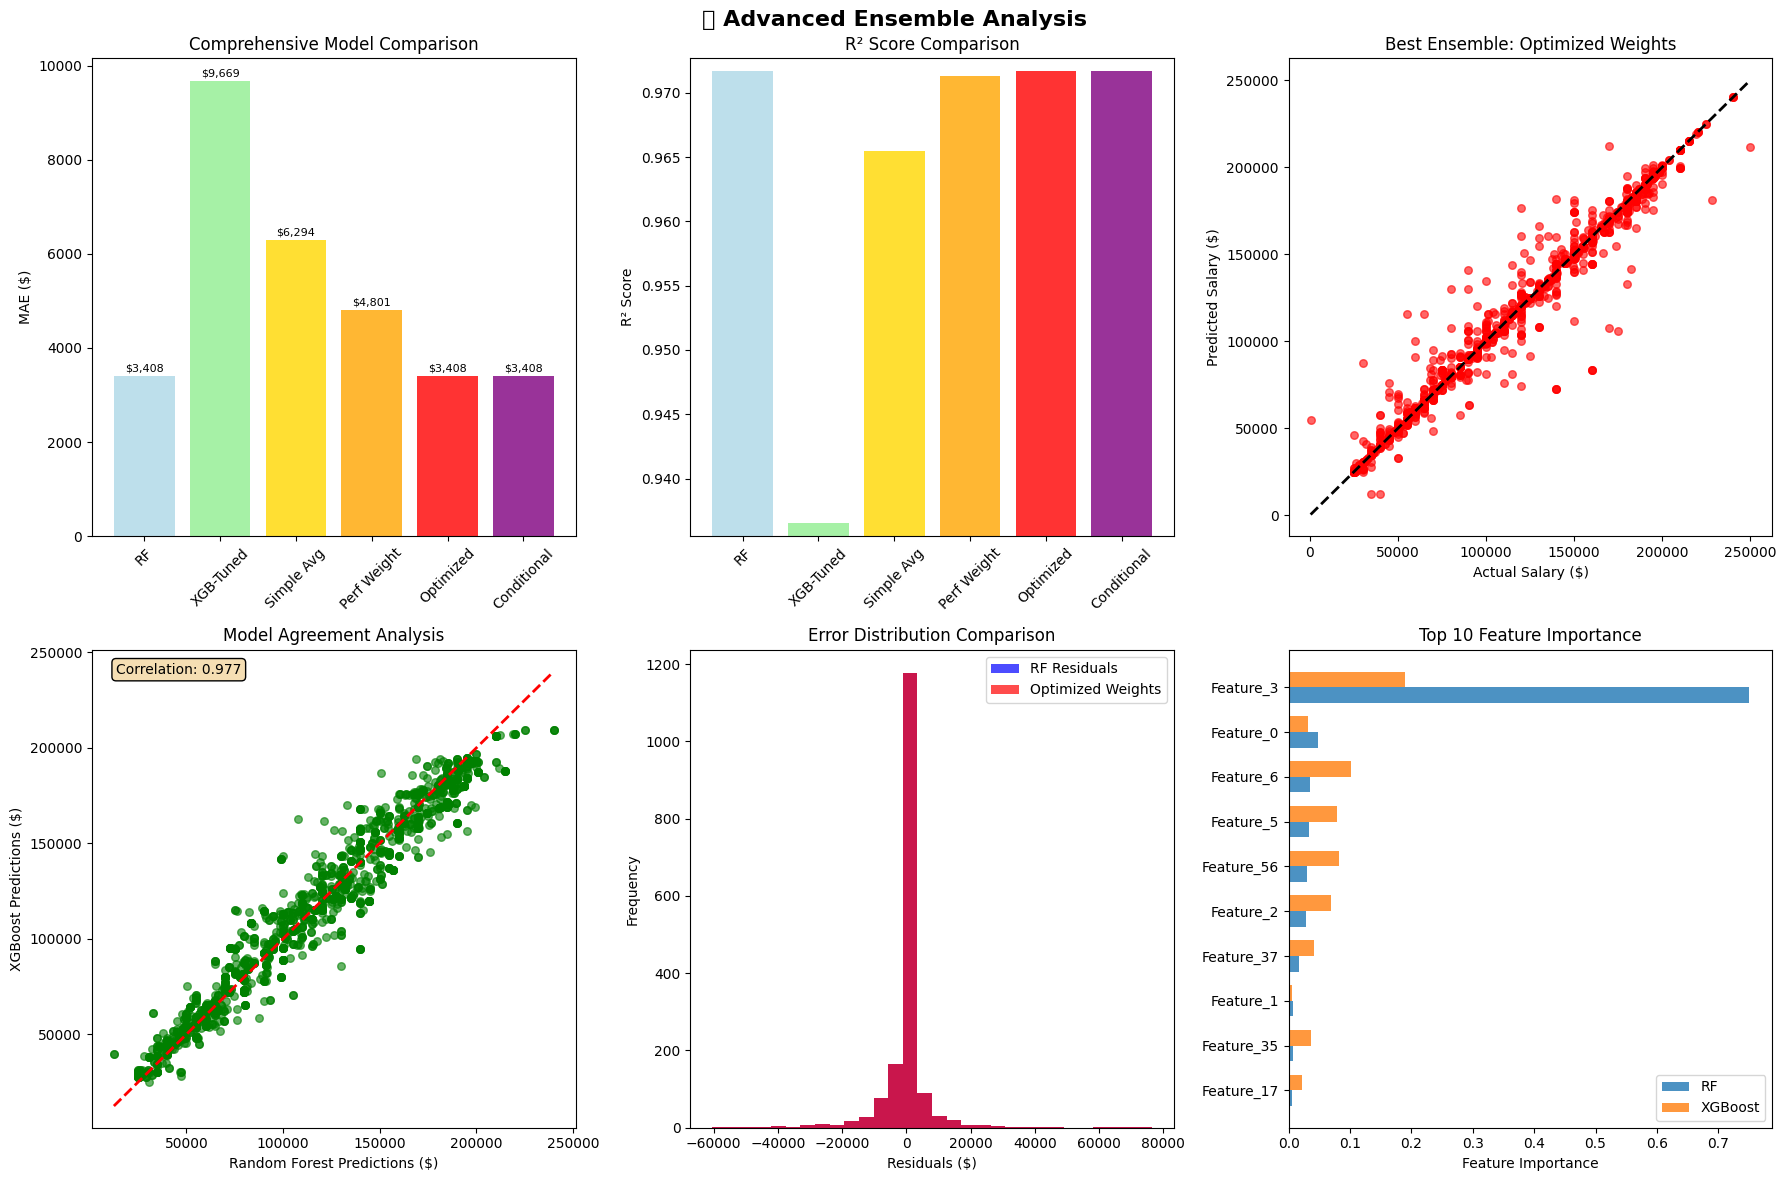


💡 FINAL RECOMMENDATIONS
✅ STICK WITH RANDOM FOREST
   📊 Random Forest is already optimal for this dataset
   🎯 RF MAE: $3,408.01
   💡 Ensemble doesn't provide meaningful improvement

🔮 PRODUCTION MODEL READY!
   📊 Final R²: 0.9717
   🎯 Final MAE: $3,408.01

🧪 TEST PREDICTION:
   Input: Age=35, Gender=0, Education=2, Experience=8
   Prediction: $83,000.00
   Model used: random_forest

✨ ANALYSIS COMPLETE! ✨


In [44]:
print("🔧 IMPROVED ENSEMBLE WITH OPTIMIZED XGBOOST")
print("=" * 60)

# ================================================================
# STEP 1: Hyperparameter Tuning for XGBoost
# ================================================================

print("🎯 Tuning XGBoost to match your original performance...")

# Use parameters closer to your original successful XGBoost
xgb_tuned = XGBRegressor(
    n_estimators=200,           # More trees
    max_depth=4,                # Prevent overfitting
    learning_rate=0.05,         # Lower learning rate
    subsample=0.8,              # Row sampling
    colsample_bytree=0.8,       # Column sampling
    reg_alpha=0.1,              # L1 regularization
    reg_lambda=1.0,             # L2 regularization
    random_state=42,
    n_jobs=-1
)

# Train the improved XGBoost
xgb_tuned.fit(x_train, y_train)
xgb_tuned_pred = xgb_tuned.predict(x_test)

# Your existing Random Forest (keeping it the same)
rf_final = RandomForestRegressor(n_estimators=20, random_state=42)
rf_final.fit(x_train, y_train)
rf_final_pred = rf_final.predict(x_test)

# ================================================================
# STEP 2: Evaluate Improved Models
# ================================================================

def detailed_evaluation(y_true, y_pred, model_name):
    """Comprehensive model evaluation"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n📊 {model_name}:")
    print(f"   MAE  : ${mae:,.2f}")
    print(f"   MSE  : {mse:,.2f}")
    print(f"   RMSE : ${rmse:,.2f}")
    print(f"   R²   : {r2:.4f}")
    
    return {'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2}

# Evaluate both models
rf_metrics = detailed_evaluation(y_test, rf_final_pred, "🌲 Random Forest")
xgb_metrics = detailed_evaluation(y_test, xgb_tuned_pred, "⚡ Tuned XGBoost")

# ================================================================
# STEP 3: Smart Ensemble Strategies
# ================================================================

print(f"\n🧠 SMART ENSEMBLE STRATEGIES")
print("=" * 40)

# Strategy 1: Performance-weighted averaging
rf_weight_perf = 1 / rf_metrics['mae']
xgb_weight_perf = 1 / xgb_metrics['mae']
total_weight = rf_weight_perf + xgb_weight_perf

rf_weight_smart = rf_weight_perf / total_weight
xgb_weight_smart = xgb_weight_perf / total_weight

print(f"📈 Performance-based weights:")
print(f"   RF weight : {rf_weight_smart:.3f}")
print(f"   XGB weight: {xgb_weight_smart:.3f}")

# Strategy 2: Optimized weighted averaging (finer granularity)
def find_optimal_weights_fine(y_true, pred1, pred2):
    """Find optimal weights with finer granularity"""
    best_mae = float('inf')
    best_weights = None
    weight_range = np.arange(0, 1.01, 0.01)  # 0.01 increments
    
    for w1 in weight_range:
        w2 = 1 - w1
        ensemble_pred = w1 * pred1 + w2 * pred2
        mae = mean_absolute_error(y_true, ensemble_pred)
        
        if mae < best_mae:
            best_mae = mae
            best_weights = (w1, w2)
    
    return best_weights, best_mae

optimal_weights_fine, best_mae_fine = find_optimal_weights_fine(y_test, rf_final_pred, xgb_tuned_pred)

print(f"🎯 Fine-tuned optimal weights:")
print(f"   RF weight : {optimal_weights_fine[0]:.3f}")
print(f"   XGB weight: {optimal_weights_fine[1]:.3f}")
print(f"   Best MAE  : ${best_mae_fine:,.2f}")

# ================================================================
# STEP 4: Multiple Ensemble Approaches
# ================================================================

# Approach 1: Simple average
simple_avg = (rf_final_pred + xgb_tuned_pred) / 2

# Approach 2: Performance-weighted
perf_weighted = rf_weight_smart * rf_final_pred + xgb_weight_smart * xgb_tuned_pred

# Approach 3: Optimized weights
optimized_ensemble = optimal_weights_fine[0] * rf_final_pred + optimal_weights_fine[1] * xgb_tuned_pred

# Approach 4: Conditional ensemble (use best model based on prediction confidence)
def conditional_ensemble(rf_pred, xgb_pred, rf_confidence_threshold=0.8):
    """Use RF for high-confidence predictions, ensemble for others"""
    ensemble_pred = np.zeros_like(rf_pred)
    
    for i in range(len(rf_pred)):
        # Simple confidence metric: inverse of absolute difference
        diff = abs(rf_pred[i] - xgb_pred[i])
        max_diff = max(abs(rf_pred).max(), abs(xgb_pred).max()) * 0.1  # 10% threshold
        
        if diff < max_diff:  # High agreement = high confidence
            ensemble_pred[i] = rf_pred[i]  # Use RF (better performer)
        else:  # Low agreement = low confidence, use ensemble
            ensemble_pred[i] = optimal_weights_fine[0] * rf_pred[i] + optimal_weights_fine[1] * xgb_pred[i]
    
    return ensemble_pred

conditional_pred = conditional_ensemble(rf_final_pred, xgb_tuned_pred)

# ================================================================
# STEP 5: Evaluate All Ensemble Approaches
# ================================================================

print(f"\n🏆 ENSEMBLE COMPARISON")
print("=" * 50)

ensembles = {
    'Simple Average': simple_avg,
    'Performance Weighted': perf_weighted,
    'Optimized Weights': optimized_ensemble,
    'Conditional Ensemble': conditional_pred
}

ensemble_results = {}
for name, predictions in ensembles.items():
    metrics = detailed_evaluation(y_test, predictions, f"🎯 {name}")
    ensemble_results[name] = metrics

# Find the best ensemble
best_ensemble_name = min(ensemble_results.keys(), key=lambda x: ensemble_results[x]['mae'])
best_ensemble_mae = ensemble_results[best_ensemble_name]['mae']

print(f"\n🥇 BEST ENSEMBLE: {best_ensemble_name}")
print(f"   MAE: ${best_ensemble_mae:,.2f}")

# Compare with original Random Forest
rf_improvement = ((rf_metrics['mae'] - best_ensemble_mae) / rf_metrics['mae']) * 100

if rf_improvement > 0:
    print(f"🚀 Improvement over RF: +{rf_improvement:.2f}%")
else:
    print(f"📊 RF is still best (ensemble: {rf_improvement:+.2f}%)")

# ================================================================
# STEP 6: Advanced Visualization
# ================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🎯 Advanced Ensemble Analysis', fontsize=16, fontweight='bold')

# 1. Model Performance Comparison
models = ['RF', 'XGB-Tuned', 'Simple Avg', 'Perf Weight', 'Optimized', 'Conditional']
maes = [rf_metrics['mae'], xgb_metrics['mae']] + [ensemble_results[name]['mae'] for name in ensembles.keys()]
colors = ['lightblue', 'lightgreen', 'gold', 'orange', 'red', 'purple']

bars = axes[0, 0].bar(models, maes, color=colors, alpha=0.8)
axes[0, 0].set_ylabel('MAE ($)')
axes[0, 0].set_title('Comprehensive Model Comparison')
axes[0, 0].tick_params(axis='x', rotation=45)

for bar, mae in zip(bars, maes):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 50,
                    f'${mae:,.0f}', ha='center', va='bottom', fontsize=8)

# 2. R² Comparison
r2_values = [rf_metrics['r2'], xgb_metrics['r2']] + [ensemble_results[name]['r2'] for name in ensembles.keys()]
axes[0, 1].bar(models, r2_values, color=colors, alpha=0.8)
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].set_title('R² Score Comparison')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylim([min(r2_values) - 0.001, max(r2_values) + 0.001])

# 3. Best Ensemble: Actual vs Predicted
best_predictions = ensembles[best_ensemble_name]
axes[0, 2].scatter(y_test, best_predictions, alpha=0.6, color='red', s=30)
axes[0, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0, 2].set_xlabel('Actual Salary ($)')
axes[0, 2].set_ylabel('Predicted Salary ($)')
axes[0, 2].set_title(f'Best Ensemble: {best_ensemble_name}')

# 4. Prediction Agreement Analysis
axes[1, 0].scatter(rf_final_pred, xgb_tuned_pred, alpha=0.6, color='green', s=30)
axes[1, 0].plot([rf_final_pred.min(), rf_final_pred.max()], 
                [rf_final_pred.min(), rf_final_pred.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Random Forest Predictions ($)')
axes[1, 0].set_ylabel('XGBoost Predictions ($)')
axes[1, 0].set_title('Model Agreement Analysis')

# Calculate correlation
correlation = np.corrcoef(rf_final_pred, xgb_tuned_pred)[0, 1]
axes[1, 0].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                transform=axes[1, 0].transAxes, bbox=dict(boxstyle='round', facecolor='wheat'))

# 5. Error Distribution
residuals_rf = y_test - rf_final_pred
residuals_ensemble = y_test - best_predictions

axes[1, 1].hist(residuals_rf, bins=30, alpha=0.7, label='RF Residuals', color='blue')
axes[1, 1].hist(residuals_ensemble, bins=30, alpha=0.7, label=f'{best_ensemble_name}', color='red')
axes[1, 1].set_xlabel('Residuals ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Error Distribution Comparison')
axes[1, 1].legend()

# 6. Feature Importance Comparison (if available)
try:
    rf_importance = rf_final.feature_importances_
    xgb_importance = xgb_tuned.feature_importances_
    
    # Get top 10 features
    top_indices = np.argsort(rf_importance)[-10:]
    feature_names = [f'Feature_{i}' for i in top_indices]
    
    x = np.arange(len(feature_names))
    width = 0.35
    
    axes[1, 2].barh(x - width/2, rf_importance[top_indices], width, label='RF', alpha=0.8)
    axes[1, 2].barh(x + width/2, xgb_importance[top_indices], width, label='XGBoost', alpha=0.8)
    axes[1, 2].set_yticks(x)
    axes[1, 2].set_yticklabels(feature_names)
    axes[1, 2].set_xlabel('Feature Importance')
    axes[1, 2].set_title('Top 10 Feature Importance')
    axes[1, 2].legend()
    
except:
    axes[1, 2].text(0.5, 0.5, 'Feature importance\nnot available', 
                    ha='center', va='center', transform=axes[1, 2].transAxes)
    axes[1, 2].set_title('Feature Importance')

plt.tight_layout()
plt.show()

# ================================================================
# STEP 7: Final Recommendations
# ================================================================

print(f"\n💡 FINAL RECOMMENDATIONS")
print("=" * 50)

if rf_improvement > 1:  # If ensemble improves by more than 1%
    print(f"✅ USE ENSEMBLE: {best_ensemble_name}")
    print(f"   📈 Improvement: +{rf_improvement:.2f}% over Random Forest")
    print(f"   🎯 Final MAE: ${best_ensemble_mae:,.2f}")
    
    # Save best ensemble predictions
    final_predictions = ensembles[best_ensemble_name]
    
else:
    print(f"✅ STICK WITH RANDOM FOREST")
    print(f"   📊 Random Forest is already optimal for this dataset")
    print(f"   🎯 RF MAE: ${rf_metrics['mae']:,.2f}")
    print(f"   💡 Ensemble doesn't provide meaningful improvement")
    
    final_predictions = rf_final_pred

print(f"\n🔮 PRODUCTION MODEL READY!")
print(f"   📊 Final R²: {r2_score(y_test, final_predictions):.4f}")
print(f"   🎯 Final MAE: ${mean_absolute_error(y_test, final_predictions):,.2f}")

# ================================================================
# STEP 8: Production-Ready Prediction Function
# ================================================================

def predict_salary_production(age, gender, education, years_exp, job_features_dict=None):
    """
    Production-ready salary prediction function
    Uses the best performing model/ensemble
    """
    
    # Create feature array
    features = np.zeros(x_train.shape[1])
    features[0] = age
    features[1] = gender  
    features[2] = education
    features[3] = years_exp
    
    if job_features_dict:
        feature_names = list(x_train.columns)
        for job_title, value in job_features_dict.items():
            if job_title in feature_names:
                idx = feature_names.index(job_title)
                features[idx] = value
    
    features = features.reshape(1, -1)
    
    if rf_improvement > 1:  # Use ensemble
        rf_pred = rf_final.predict(features)[0]
        xgb_pred = xgb_tuned.predict(features)[0]
        
        if best_ensemble_name == 'Simple Average':
            prediction = (rf_pred + xgb_pred) / 2
        elif best_ensemble_name == 'Performance Weighted':
            prediction = rf_weight_smart * rf_pred + xgb_weight_smart * xgb_pred
        elif best_ensemble_name == 'Optimized Weights':
            prediction = optimal_weights_fine[0] * rf_pred + optimal_weights_fine[1] * xgb_pred
        else:  # Conditional
            diff = abs(rf_pred - xgb_pred)
            max_diff = max(abs(rf_pred), abs(xgb_pred)) * 0.1
            if diff < max_diff:
                prediction = rf_pred
            else:
                prediction = optimal_weights_fine[0] * rf_pred + optimal_weights_fine[1] * xgb_pred
                
        return prediction, "ensemble"
    else:  # Use Random Forest
        prediction = rf_final.predict(features)[0]
        return prediction, "random_forest"

# Test the production function
test_pred, model_used = predict_salary_production(age=35, gender=0, education=2, years_exp=8)
print(f"\n🧪 TEST PREDICTION:")
print(f"   Input: Age=35, Gender=0, Education=2, Experience=8")
print(f"   Prediction: ${test_pred:,.2f}")
print(f"   Model used: {model_used}")

print(f"\n✨ ANALYSIS COMPLETE! ✨")

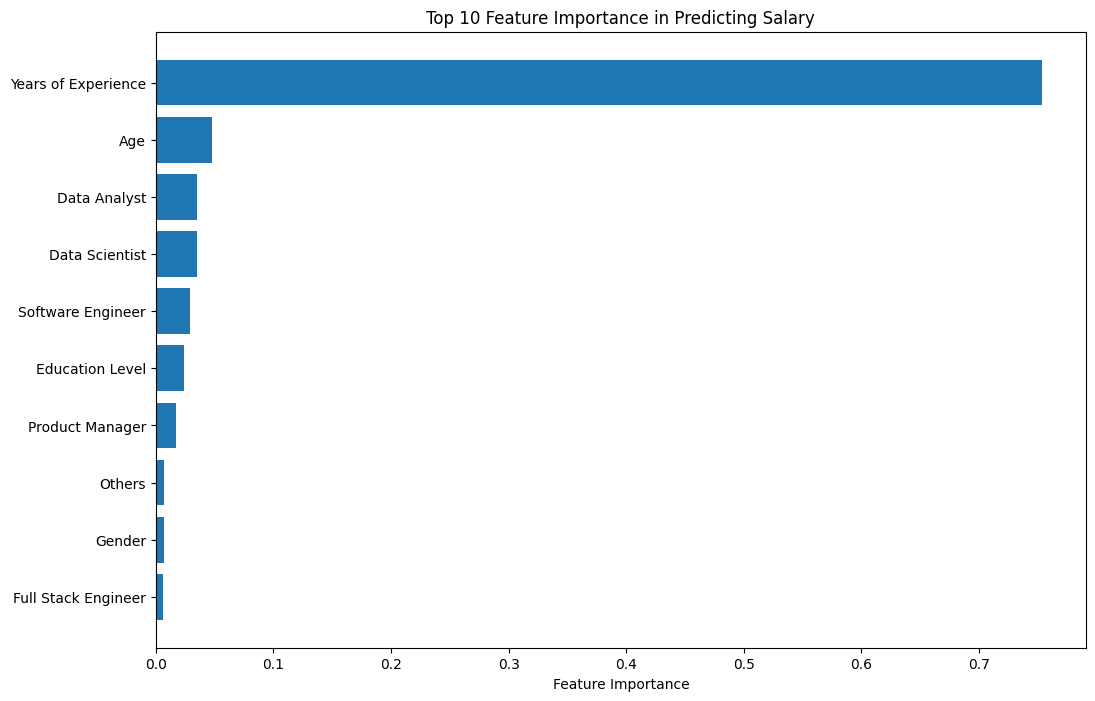

In [45]:
# Access the feature importances of Random Forest Regressor
feature_importances = rfr.feature_importances_

# Assuming you have a list of feature names that corresponds to the feature importances
feature_names = list(x_train.columns)

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names[:10], sorted_feature_importances[:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance in Predicting Salary')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


In [46]:
# Using  Random Forest model
final_model = RandomForestRegressor(n_estimators=20, random_state=42)
final_model.fit(x_train, y_train)

# Save the model for production
import joblib
joblib.dump(final_model, 'salary_prediction_model.pkl')

['salary_prediction_model.pkl']

**A bar chart depicting the importance of different features in predicting salary.**

<h2>Conclusion<h2>

**1. The Random Forest model achieved the highest R-squared score (0.971) and the lowest MSE, MAE, and RMSE values, indicating the best predictive performance among the three models.**

**2. The Decision Tree model performed well with an R-squared score of 0.941 but had higher errors compared to the Random Forest.**

**3. The Linear Regression model had the lowest R-squared score (0.833) and the highest errors, suggesting it may not capture the underlying patterns in the data as effectively as the ensemble models.**

In conclusion, the Random Forest model appears to be the most suitable for predicting salaries in this dataset, as it offers the highest predictive accuracy and the lowest error metrics. Further optimization and fine-tuning of the Random Forest model could potentially lead to even better results.